# Predicting Smart Grid Stability with Deep Learning
### Release 2.0 - June, 2020
### Paulo Breviglieri

## Foreword

<p style="text-align: justify">This notebook is based on the "<b>Electrical Grid Stability Simulated Dataset</b>", created by Vadim Arzamasov (Karlsruher Institut für Technologie, Karlsruhe, Germany) and donated to the <b>University of California (UCI) Machine Learning Repository</b> (link <a href="https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+#">here</a>), where it is currently hosted.</p>
<p style="text-align: justify">Two primary references support this machine learning exercise and demand special mention:</p>
<ol>
    <li>"<em><b>Taming instabilities in power grid networks by decentralized control</b></em>" (B. Schäfer, et al, The European Physical Journal, Special Topics, 2016, 225.3: 569-582), in which Dr. Schäfer (Network Dynamics, Max Planck Institute for Dynamics and Self-Organization - MPIDS, Göttingen, Germany) and his co-authors describe in detail the DSGC (Decentral Smart Grid Control) differential equation-based model to assess stability of smart grids;</li>
    <p></p>
    <li>"<em><b>Towards Concise Models of Grid Stability</b></em>" (V. Arzamasov, K. Böhm and P. Jochem, 2018 IEEE International Conference on Communications, Control, and Computing Technologies for Smart Grids (SmartGridComm), Aalborg, 2018, pp. 1-6), in which Dr. Arzamasov and his co-authors explore how data-mining techniques can address DSGC model simplifications.</li>
</ol>
<p style="text-align: justify">The author is particularly thankful for Dr. Arzamasov's personal guidance and comments on the overall dataset structure.</p>
<p style="text-align: justify">Logic enhancement and code forking are welcome and encouraged provided that this work is properly referenced. Thank you.</p>

## 1. Introduction

### 1.1. Renewable Energy Sources and Smart Grids

<p style="text-align: justify">The ascent of renewable energy sources provides the global community with a much demanded alternative to traditional, finite and climate-unfriendly fossil fuels. However, their adoption poses a set of new paradigms, out of which two interrelated aspects deserve particular attention:</p>
<ul>
    <li style="text-align: justify">Prior to the rise of renewable energy sources, the traditional operating ecosystem involved few production entities (sources) supplying energy to consumers over unidirectional flows. With the advent of renewable options, end users (households and enterprises) now not only consume energy but have the ability to produce and supply it - hence a new term to designate them, '<b>prosumers</b>'. As a result, energy flow within distribution grids - '<b>smart grids</b>' - has become <b>bidirectional</b>;</li>
    <li style="text-align: justify">Despite the increased flexibility brought in by the introduction of renewable sources and the aforementioned emergence of 'prosumers', the management of supply and demand in a more complex generation / distribution / consumption environment and the related economic implications (particularly the decision to buy energy at a given price or not) have become even more challenging.</li>
</ul>
<p style="text-align: justify">Relevant contributions on how to tackle the requirements of such new scenario have been offered by academy and industry over the past years. Special attention has been devoted to the study of <b>smart grid stability</b>.</p>

### 1.2. Modeling grid stability

<p style="text-align: justify">In a smart grid, consumer demand information is collected, centrally evaluated against current supply conditions and the resulting proposed price information is sent back to customers for them to decide about usage. As the whole process is time-dependent, dinamically estimating <b>grid stability</b> becomes not only a concern but a major requirement.</p>
<p style="text-align: justify">Put simply, the objective is to understand and plan for both energy production and/or consumption disturbances and fluctuations introduced by system participants in a dynamic way, taking into consideration not only technical aspects but also how participants respond to changes in the associated economic aspects (energy price).</p>
<p style="text-align: justify">The work of researchers cited in foreword focuses on <b>Decentral Smart Grid Control</b> (DSGC) systems, a methodology strictly tied to monitoring one particular property of the grid - its frequency.</p>
<p style="text-align: justify">The term '<em>frequency</em>' refers to the alternate current (AC) frequency, measured in cycles per second or its equivalent unit, Hertz (Hz). Around the world AC frequencies of either 50 or 60 Hz are utilized in electric power generation-distribution systems.</p>
<p style="text-align: justify">It is known that the electrical signal frequency "<em>increases in times of excess generation, while it decreases in times of underproduction</em>" [1]. Therefore, <b>measuring the grid frequency</b> at the premise of each customer would suffice to provide the network administrator with all required information about the current <b>network power balance</b>, so that it can price its energy offering - and inform consumers - accordingly.</p>
<p style="text-align: justify">The DSGC differential equation-based mathematical model described in [1] and assessed in [2] aims at identifying grid instability for a reference <b>4-node star</b> architecture, comprising one power source (a centralized generation node) supplying energy to three consumption nodes. The model takes into consideration inputs (features) related to:
    <ul>
        <li>the total <b>power balance</b> (nominal power produced or consumed at each grid node);</li>
        <li>the response time of participants to adjust consumption and/or production in response to price changes (referred to as "<b>reaction time</b>);</li>
        <li>energy <b>price elasticity</b>.</li>
    </ul>

<img src="https://i.imgur.com/hvmW0cg.png" width="500" height="100">

### 1.3. Addressing simplifications in the model

<p style="text-align: justify">So we have a mathematical model with which grid instability can be predicted! The need of a tool to predict grid instability would have been met, and the binary classification ("stable" versus "unstable") problem would be solved! However, the execution of this model relies on significant <b>simplifications</b>.</p>
<p style="text-align: justify">A differential equation-based model can be manipulated in several ways. One traditional approach consists in running simulations with a combination of fixed values for one subset of variables and fixed value distributions for the remaining subset. As elegantly depicted in [2], this strategy leads to <b>two primary issues</b>, referred to as the "fixed inputs issue" and the "equality issue". Please refer to [2] for a comprehensive assessment of both issues.</p>
<p style="text-align: justify">Alternative approaches have been proposed to overcome the inherent DSGC model simplifications. In particular, Dr. Arzamasov's team at the KIT suggest the use of machine learning - <b>decision trees (CART)</b> - and space-filling designs to process results from simulations with different DSGC parameter configurations.</p>
<p>In other words, machine learning is used in [2] in the following way:</p>
<ol>
    <li>A given set of input parameters (call it a 'vector') is fed into the original DSGC model;</li>
    <li>The DSGC model process this vector and returns a binary output - the grid stability for that particular set of inputs ('stable' or 'unstable' - a binary classification!);</li>
    <li>Steps 1 and 2 are executed 'n' times;</li>
    <li>A large set of vectors and the respective outputs (stability or instability) is created.</li>
</ol>
<p>In summary, the original DSGC model was run to generate a set of inputs and outputs that a 'learning machine' can process and make predictions from!</p>
<p>Per [2], accuracies of "around 80%" have been achieved with the CART-based learning machine.</p>

## 2. Objectives of this machine learning exercise

<p style="text-align: justify">Considering the nature of the problem to be investigated and the dataset properties (as described in Section 3 below), two major objectives are proposed:</p>
<ol>
    <li style="text-align: justify">Pursue improvements in predictions with <b>deep learning</b> (Keras' Sequential model);</li>
    <li style="text-align: justify">Take the opportunity to assess the influence of deep learning architecture (number and size of hidden layers), number of epochs and the relevance of dataset augmentation.</li>
</ol>

## 3. The dataset

<p style="text-align: justify">The dataset chosen for this machine learning exercise has a synthetic nature and contains results from simulations of grid stability for a reference 4-node star network, as described in 1.2.</p>
<p style="text-align: justify">The original dataset contains 10,000 observations. As the reference grid is symetric, the dataset can be augmented in 3! (3 factorial) times, or 6 times, representing a permutation of the three consumers occupying three consumer nodes. The augmented version has then <b>60,000 observations</b>. It also contains <b>12 primary predictive features</b> and two dependent variables. </p>
<p><b>Predictive features</b>:</p>
<ol>
    <li>'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);</li>
    <li>'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);</li>
    <li>'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');</li>
</ol>
<p><b>Dependent variables</b>:</p>
<ol>
    <li>'stab': the maximum real part of the characteristic differentia equation root (if positive, the system is linearly unstable; if negative, linearly stable);</li>
    <li>'stabf': a categorical (binary) label ('stable' or 'unstable').</li>
</ol>
<p style="text-align: justify">As there is a direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' will be dropped and 'stabf' will remain as the sole dependent variable.</p>
<p style="text-align: justify">As the dataset content comes from simulation exercises, there are no missing values. Also, all features are originally numerical, no feature coding is required. Such dataset properties allow for a direct jump to machine modeling without the need of data preprocessing or feature engineering.</p>

## 4. Initial setup

### 4.1. Importing required libraries

<p style="text-align: justify">Along with traditional libraries imported for tensor manipulation, mathematical operations and graphics development, three scikit-learn modules (StandardScaler as a scaler, confusion_matrix as the model performance metric of choice and KFold as the cross validation engine) and two Keras deep learning objects (Sequential and Dense) are used in this exercise.</p>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

from keras.models import Sequential
from keras.layers import Dense

from datetime import datetime

### 4.2. Customized functions

<p style="text-align: justify">Functions were developed to assist with graphical analysis of specific dataset elements (features or observations) and mapping correlation. Please refer to the respective docstrings below for details. Note that all function variable names, by coding principle, start with the "f_" string, allowing for containerized processing within the function execution environment, not affecting global variables.</p>

In [17]:
def assessment(f_data, f_y_feature, f_x_feature, f_index=-1):
    """
    Develops and displays a histogram and a scatter plot for a dependent / independent variable pair from
    a dataframe and, optionally, highlights a specific observation on the plot in a different color (red).
    
    Also optionally, if an independent feature is not informed, the scatterplot is not displayed.
    
    Keyword arguments:
    
    f_data      Tensor containing the dependent / independent variable pair.
                Pandas dataframe
    f_y_feature Dependent variable designation.
                String
    f_x_feature Independent variable designation.
                String
    f_index     If greater or equal to zero, the observation denoted by f_index will be plotted in red.
                Integer
    """
    for f_row in f_data:
        if f_index >= 0:
            f_color = np.where(f_data[f_row].index == f_index,'r','g')
            f_hue = None
        else:
            f_color = 'b'
            f_hue = None
    
    f_fig, f_a = plt.subplots(1, 2, figsize=(16,4))
    
    f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='g')
    f_chart1.set_xlabel(f_x_feature,fontsize=10)
    
    if f_index >= 0:
        f_chart2 = plt.scatter(f_data[f_x_feature], f_data[f_y_feature], c=f_color, edgecolors='w')
        f_chart2 = plt.xlabel(f_x_feature, fontsize=10)
        f_chart2 = plt.ylabel(f_y_feature, fontsize=10)
    else:
        f_chart2 = sns.scatterplot(x=f_x_feature, y=f_y_feature, data=f_data, hue=f_hue, legend=False)
        f_chart2.set_xlabel(f_x_feature,fontsize=10)
        f_chart2.set_ylabel(f_y_feature,fontsize=10)

    plt.show()

    
def correlation_map(f_data, f_feature, f_number):
    """
    Develops and displays a heatmap plot referenced to a primary feature of a dataframe, highlighting
    the correlation among the 'n' mostly correlated features of the dataframe.
    
    Keyword arguments:
    
    f_data      Tensor containing all relevant features, including the primary.
                Pandas dataframe
    f_feature   The primary feature.
                String
    f_number    The number of features most correlated to the primary feature.
                Integer
    """
    f_most_correlated = f_data.corr().nlargest(f_number,f_feature)[f_feature].index
    f_correlation = f_data[f_most_correlated].corr()
    
    f_mask = np.zeros_like(f_correlation)
    f_mask[np.triu_indices_from(f_mask)] = True
    with sns.axes_style("white"):
        f_fig, f_ax = plt.subplots(figsize=(20, 10))
        sns.heatmap(f_correlation, mask=f_mask, vmin=-1, vmax=1, square=True,
                    center=0, annot=True, annot_kws={"size": 8}, cmap="PRGn")
    plt.show()

### 4.3. Importing required datasets into dataframes

<p style="text-align: justify">The augmented dataset (60,000 observations) is imported. The dependent variable is map encoded ('stable' replaced with 1, 'unstable' with 0). At last, the 60,000 observations are shuffled.</p>

In [18]:
sns.set()
start_time = datetime.now()

data = pd.read_csv('../input/smart-grid-stability/smart_grid_stability_augmented.csv')

map1 = {'unstable': 0, 'stable': 1}
data['stabf'] = data['stabf'].replace(map1)

data = data.sample(frac=1)

## 5. Exploratory data analysis

<p style="text-align: justify">A glimpse at the dataset structure confirms observation shuffling and the close relationship between the two original dependent variables 'stab' and 'stabf'.</p>

In [19]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
57989,9.562396,4.116094,1.901560,7.139730,4.325289,-1.879712,-1.058255,-1.387322,0.580021,0.265961,0.554372,0.361337,-0.004111,1
32539,3.765258,5.431668,2.592211,4.084424,4.006596,-1.774922,-0.925240,-1.306434,0.462051,0.294906,0.892901,0.117408,-0.010190,1
9484,3.208294,6.307944,4.842714,3.439213,4.257293,-1.541095,-1.637100,-1.079098,0.060159,0.226980,0.774197,0.084681,-0.021172,1
37919,6.319801,8.958980,0.804020,9.812659,4.397960,-1.857033,-0.685656,-1.855271,0.852178,0.379789,0.964345,0.281809,-0.002539,1
52210,9.365787,6.758593,2.356795,0.799442,5.038259,-1.611869,-1.610353,-1.816037,0.805514,0.727257,0.876670,0.950227,-0.002726,1


### 5.1. Feature assessment

<p style="text-align: justify">Distribution patterns and the relationship with the 'stab' dependent variable is charted for each of the 12 dataset features.</p>
<p style="text-align: justify">As this data comes from simulations with predetermined fixed ranges for all features, as described in Section 3, distributions are pretty much uniform across the board, with the exception of 'p1' (absolute sum of 'p2', 'p3' and 'p4'), which follows a normal distribution (as expected) with a very small skew factor of -0.013.</p>

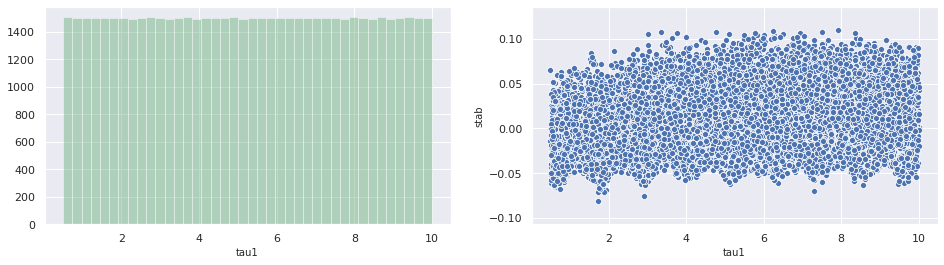

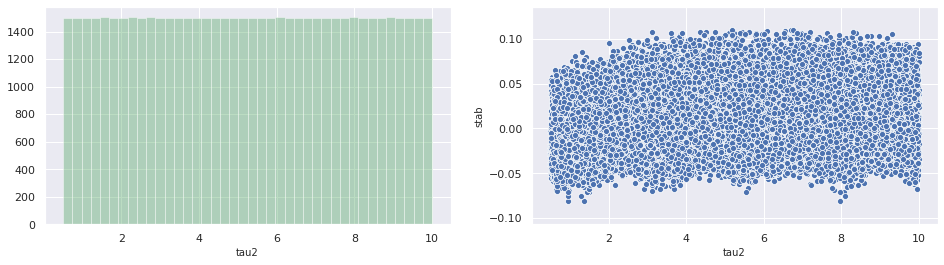

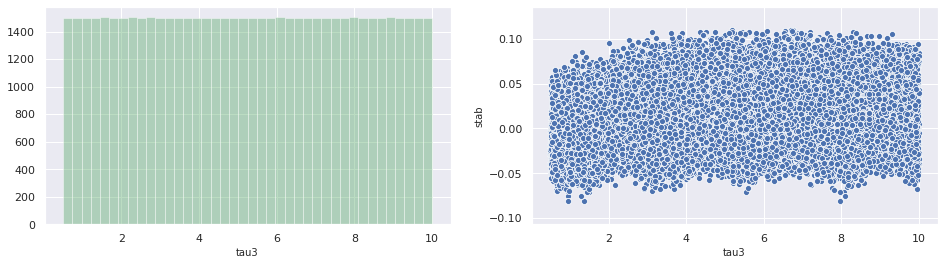

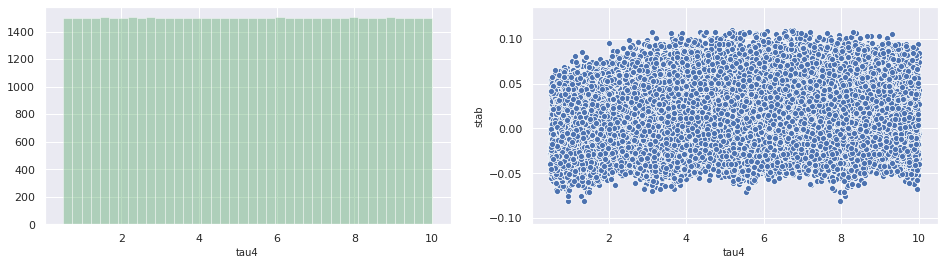

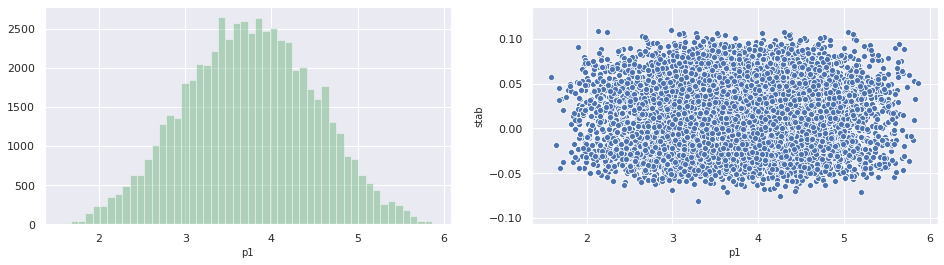

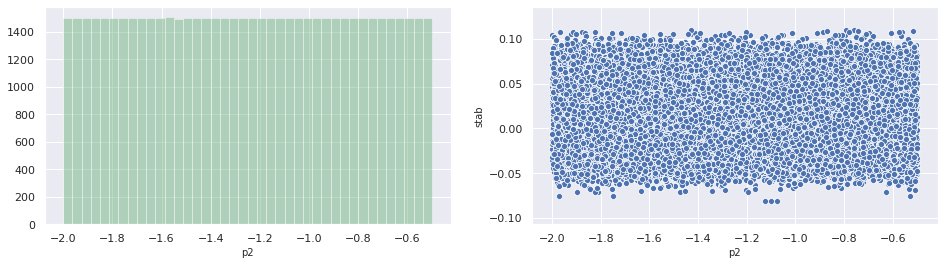

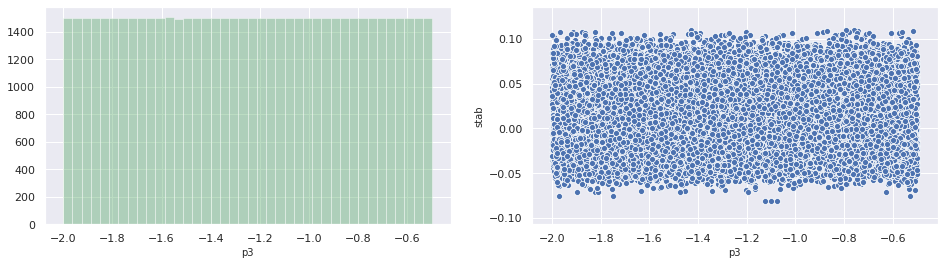

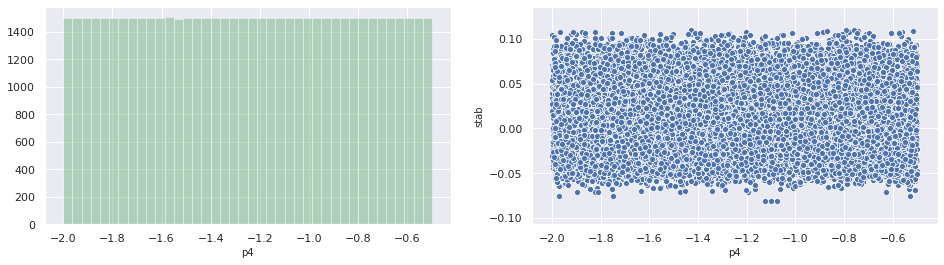

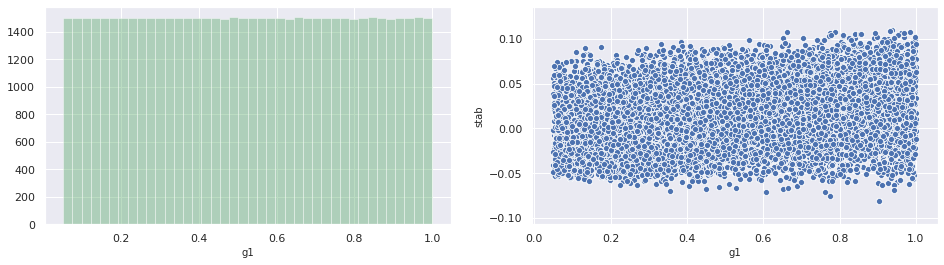

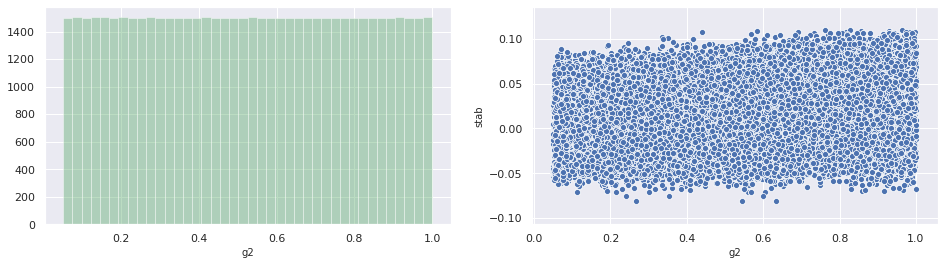

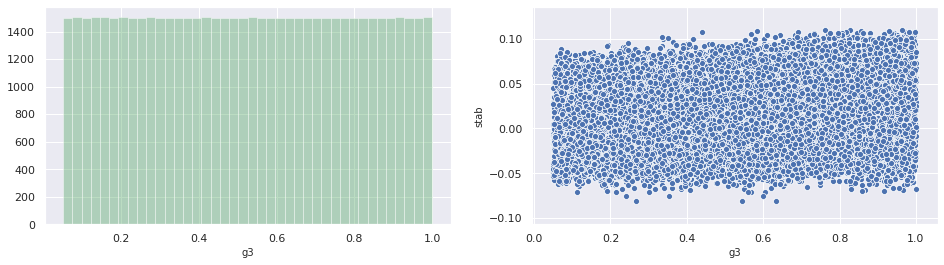

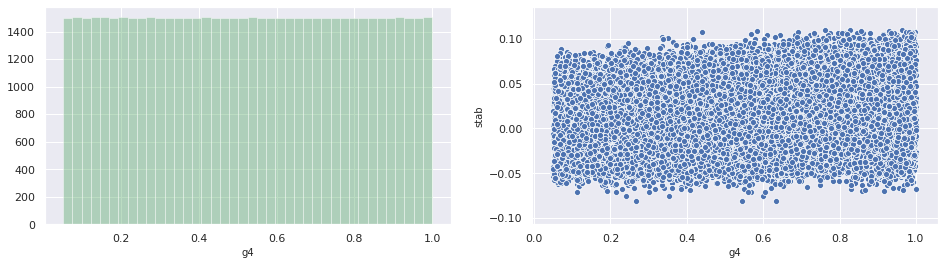

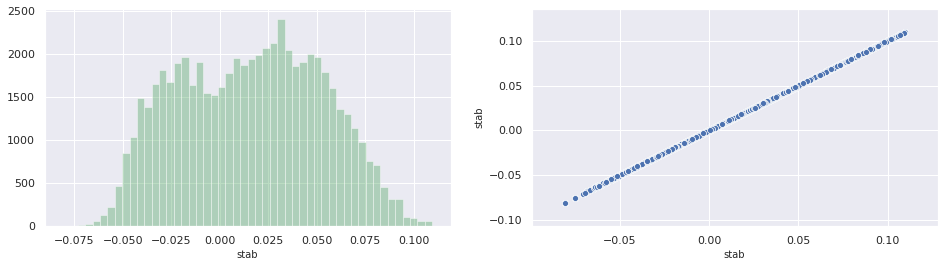

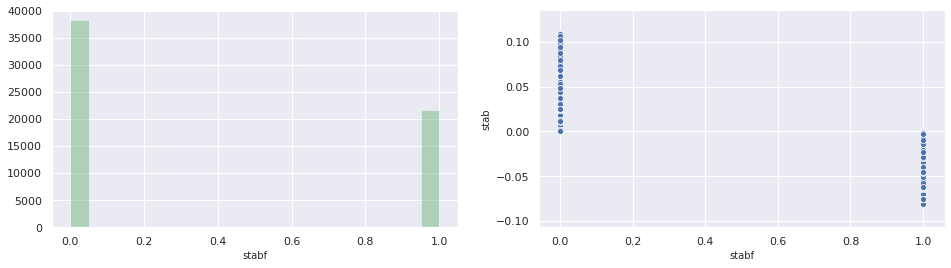

In [20]:
for column in data.columns:
    assessment(data, 'stab', column, -1)

In [6]:
data.p1.skew()

-0.01268842326988171

<p style="text-align: justify">The proportion of observations related to 'unstable' and 'stable' scenarios is mapped.</p>

In [21]:
print(f'Split of "unstable" (0) and "stable" (1) observations in the original dataset:')
print(data['stabf'].value_counts(normalize=True))

Split of "unstable" (0) and "stable" (1) observations in the original dataset:
0    0.638
1    0.362
Name: stabf, dtype: float64


### 5.2. Correlation

<p style="text-align: justify">It is important to verify the correlation between each numerical feature and the dependent variable, as well as correlation among numerical features leading to potential undesired colinearity. The heatmap below provides an overview of correlation between the dependent variable ('stabf') and the 12 numerical features. Note that also the alternative dependent variable ('stab') has been included just to give an idea of how correlated it is with 'stabf'. Such correlation is significant (-0.83), as it should be, which reinforces the decision to drop it, anticipated in Section 3. Also, correlation between 'p1' and its components 'p2', 'p3' and 'p4' is above average, as expected, but not as high o justify any removal. </p>

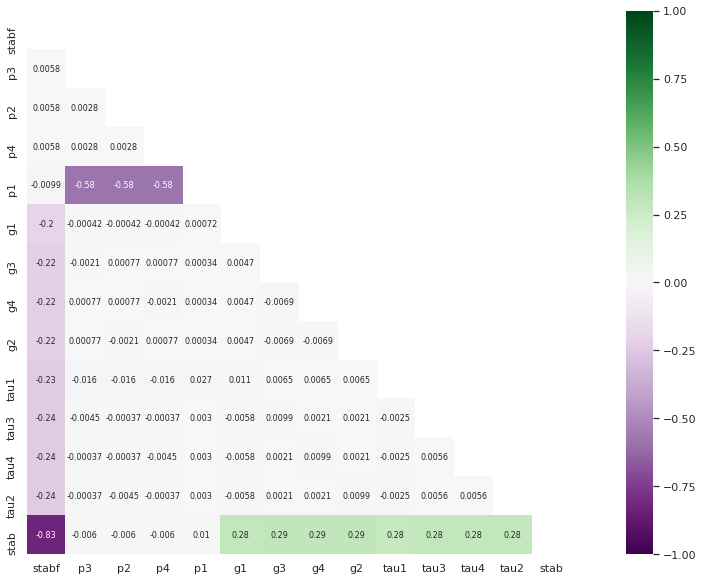

In [22]:
correlation_map(data, 'stabf', 14)

### 5.3. Segregating train and test sets

<p style="text-align: justify">As anticipated, the features dataset will contain all 12 original predictive features, while the label dataset will contain only 'stabf' ('stab' is dropped here).</p>
<p style="text-align: justify">In addition, as the dataset has already been shuffled, the training set will receive the first 54,000 observations, while the testing set will accommodate the last 6,000.</p>
<p style="text-align: justify">Even considering that the dataset is large enough and well behaved, the percentage of 'stable' and 'unstable' observations is computed for both training and testing sets, just to make sure that the original dataset distribution is maintained after the split - which proved to be the case.</p>
<p style="text-align: justify">After splitting, Pandas dataframes and series are transformed into Numpy arrays for the remainder of the exercise.</p>

In [23]:
X = data.iloc[:, :12]
y = data.iloc[:, 13]

X_training = X.iloc[:54000, :]
y_training = y.iloc[:54000]

X_testing = X.iloc[54000:, :]
y_testing = y.iloc[54000:]

ratio_training = y_training.value_counts(normalize=True)
ratio_testing = y_testing.value_counts(normalize=True)
ratio_training, ratio_testing

(0    0.638352
 1    0.361648
 Name: stabf, dtype: float64,
 0    0.634833
 1    0.365167
 Name: stabf, dtype: float64)

In [27]:
X_training = X_training.values
y_training = y_training.values

X_testing = X_testing.values
y_testing = y_testing.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

### 5.4. Feature scaling

<p style="text-align: justify">In preparation for machine learning, scaling is performed based on (fitted to) the training set and applied (with the 'transform' method) to both training and testing sets.</p>

In [29]:
scaler = StandardScaler()
X_training = scaler.fit_transform(X_training)
X_testing = scaler.transform(X_testing)

## 6. Deep Learning

### 6.1. Model definition

<p style="text-align: justify">The artificial neural network (ANN) architecture depicted below is the optimal one evaluated in this study. It reflects an sequential structure with:</p>
<ul>
    <li>one input layer (12 input nodes);</li>
    <li>three hidden layers (24, 24 and 12 nodes, respectively);</li>
    <li>one single-node output layer.</li>
</ul>
<p style="text-align: justify">Alternative architectures were evaluated with variations of the code below. Their performance will be discussed in Section 7.</p>
<p style="text-align: justify">As features are numerical real numbers within ranges, the choice of 'relu' as the activation function for hidden layers seems straightforward. Similarly, as this is a logistic classification exercise, where the output is binary ('0' for 'unstable', '1' for 'stable', following the map coding used in Section 4.3), the choice of 'sigmoid' as activation for the output layers seems obvious.</p>
<p style="text-align: justify">Compilation with 'adam' as optimizer and 'binary_crossentropy' as the loss function follow the same logic. The fitting performance will be assessed using 'accuracy' as the metric of choice.</p>

<img src="https://i.imgur.com/Uu57iWd.png" width="600" height="600">

In [30]:
# ANN initialization
classifier = Sequential()

# Input layer and first hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

# Second hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Third hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))

# Single-node output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# ANN compilation
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


### 6.2. Model fitting

<p style="text-align: justify">Even considering that data is well behaved and in general uniformly distributed, a cross-validation based fitting is proposed. KFold is the cross-validation engine selected, and 10 different validation sets will be utilized.</p>

In [31]:
cross_val_round = 1
print(f'Model evaluation\n')

for train_index, val_index in KFold(10, shuffle=True, random_state=10).split(X_training):
    x_train, x_val = X_training[train_index], X_training[val_index]
    y_train ,y_val = y_training[train_index], y_training[val_index]
    classifier.fit(x_train, y_train, epochs=50, verbose=0)
    classifier_loss, classifier_accuracy = classifier.evaluate(x_val, y_val)
    print(f'Round {cross_val_round} - Loss: {classifier_loss:.4f} | Accuracy: {classifier_accuracy * 100:.2f} %')
    cross_val_round += 1

Model evaluation

5400/5400 [==============================] - 0s 26us/step
Round 1 - Loss: 0.0789 | Accuracy: 96.74 %
5400/5400 [==============================] - 0s 22us/step
Round 2 - Loss: 0.0672 | Accuracy: 96.91 %
5400/5400 [==============================] - 0s 21us/step
Round 3 - Loss: 0.0471 | Accuracy: 98.15 %
5400/5400 [==============================] - 0s 18us/step
Round 4 - Loss: 0.0591 | Accuracy: 97.85 %
5400/5400 [==============================] - 0s 17us/step
Round 5 - Loss: 0.0474 | Accuracy: 97.98 %
5400/5400 [==============================] - 0s 18us/step
Round 6 - Loss: 0.0446 | Accuracy: 98.17 %
5400/5400 [==============================] - 0s 19us/step
Round 7 - Loss: 0.0303 | Accuracy: 98.74 %
5400/5400 [==============================] - 0s 17us/step
Round 8 - Loss: 0.0432 | Accuracy: 98.19 %
5400/5400 [==============================] - 0s 17us/step
Round 9 - Loss: 0.0460 | Accuracy: 98.37 %
5400/5400 [==============================] - 0s 17us/step
Round 10 - Loss

### 6.3. Predicting smart grid stability

<p style="text-align: justify">After fitting the model to the training set, it is time to extract predictions for the testing set and segregate those above the 'threshold' of 0.5 ('unstable' cases below the threshold, 'stable' cases above it).</p>

In [35]:
y_pred = classifier.predict(X_testing)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

## 7. Results

### 7.1. Classification performance - Confusion matrix

<p style="text-align: justify">The segregation described in Section 6.3 allows for the construction of a confusion matrix.</p>

In [36]:
cm = pd.DataFrame(data=confusion_matrix(y_testing, y_pred, labels=[0, 1]),
                  index=["Actual Unstable", "Actual Stable"],
                  columns=["Predicted Unstable", "Predicted Stable"])
cm

,Predicted Unstable,Predicted Stable
Actual Unstable,3747,62
Actual Stable,68,2123


In [37]:
print(f'Accuracy per the confusion matrix: {((cm.iloc[0, 0] + cm.iloc[1, 1]) / len(y_testing) * 100):.2f}%')

Accuracy per the confusion matrix: 97.83%


### 7.2. Alternative configurations

<p style="text-align: justify">The architecture and the hyperparameters selected above led to the best prediction performance on the test set.</p>
<p style="text-align: justify">In addition, several other combinations were evaluated for both the original dataset with 1,000 observations and the augmented dataset with 6,000 observations. It is important to emphasize that in this comparative assessment <b>no shuffling</b> of any type, at any part of the exercise, was performed, so that the very same testing set was exposed to model after fitting for performance assessment.</p>
<p style="text-align: justify">The table below summarizes obtained results:</p>

<img src="https://i.imgur.com/HQ2wySQ.png" width="1024" height="203">

## 8. Discussion and Final Remarks

<p style="text-align: justify">Specific aspects of this deep learning exercise demand special attention:</p>
<ol>
    <li style="text-align: justify">Deep learning proved to be an outstanding prediction tool for this particular application. Even considering that the dataset is well behaved and needed no significant preprocessing, the <b>high accuracies</b> obtained on the testing set confirm that a deep learning model may be safely considered. It would though be up to a smart grid operator to confirm if the accuracy level obtained with deep learning would suffice in practical terms (live network);</li>
    <li style="text-align: justify">As expected, more complex ANN architectures <b>performed better</b> than simpler ones;</li>
    <li style="text-align: justify">An <b>increased number of epochs</b> considered during fitting also plays a major role. It is evident that the more the model is exposed to the training set, the better the prediction accuracy;</li>
    <li style="text-align: justify">From a machine learning exercise perspective, the use of an <b>augmented dataset</b> with 6,000 observations contributed significantly to better results;</li>
    <li style="text-align: justify">It must be noted that input parameters utilized in the original DSGC simulations fall within predetermined ranges. As a follow-up step in the validation of this learning machine, it would be interesting to assess its performance using a new test set with observations obtained from simulations with input parameter values residing in other alternative ranges.
</ol>

In [38]:
end_time = datetime.now()

print('\nStart time', start_time)
print('End time', end_time)
print('Time elapsed', end_time - start_time)


Start time 2022-04-05 09:01:04.221871
End time 2022-04-05 09:22:39.273205
Time elapsed 0:21:35.051334
